In [ ]:
import pandas as pd
import numpy as np
import sys
import sklearn
print(pd.__version__)
print(np.__version__)
print(sys.version)
print(sklearn.__version__)
!pip install scapy

1.1.5
1.19.5
3.7.10 (default, Feb 20 2021, 21:17:23) 
[GCC 7.5.0]
0.22.2.post1
     |████████████████████████████████| 1.0MB 5.7MB/s 
  Created wheel for scapy: filename=scapy-2.4.4-py2.py3-none-any.whl size=1189182 sha256=68d546483dc252c2ef07acaabdccefe56e555d30af2d8d230ceac06ff09475aa
  Stored in directory: /root/.cache/pip/wheels/2c/e7/01/f097df99ac9cd0d4f744c255f918d471d7a4b0766bc84c38c3
Successfully built scapy


In [ ]:
cols="""duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate"""

columns=[]
for c in cols.split(','):
    if(c.strip()):
       columns.append(c.strip())

columns.append('target')
#print(columns)
print(len(columns))


42


In [ ]:
attacks_types = {
    'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}

In [ ]:
df = pd.read_csv('a.csv')

#Adding Attack Type column
#df['Attack Type'] = df.target.apply(lambda r:attacks_types[r[:-1]])

df.head(-10)


,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,192.168.1.132,239.255.255.250,SSDP,352,NOTIFY * HTTP/1.1
1,2,0.050720,192.168.1.132,239.255.255.250,SSDP,352,NOTIFY * HTTP/1.1
2,3,0.100190,192.168.1.132,239.255.255.250,SSDP,361,NOTIFY * HTTP/1.1
3,4,0.150913,192.168.1.132,239.255.255.250,SSDP,361,NOTIFY * HTTP/1.1
4,5,0.201385,192.168.1.132,239.255.255.250,SSDP,355,NOTIFY * HTTP/1.1
...,...,...,...,...,...,...,...
21649,21650,78810.509070,192.168.1.132,239.255.255.250,SSDP,352,NOTIFY * HTTP/1.1
21650,21651,78810.559533,192.168.1.132,239.255.255.250,SSDP,352,NOTIFY * HTTP/1.1
21651,21652,78810.609254,192.168.1.132,239.255.255.250,SSDP,361,NOTIFY * HTTP/1.1
21652,21653,78810.659475,192.168.1.132,239.255.255.250,SSDP,361,NOTIFY * HTTP/1.1


In [ ]:
!pip install tensorflow.io
%tensorflow_version 2.x
import tensorflow as tf
import tensorflow_io as tfio 
import numpy as np

     |████████████████████████████████| 25.3MB 158kB/s 


In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
import tensorflow_io as tfio 
import numpy as np

# Create an IODataset from a pcap file  
first_file = tfio.IODataset.from_pcap('/content/fuzz-2006-06-26-2594.pcap')
second_file = tfio.IODataset.from_pcap(['/content/fuzz-2006-08-27-19853.pcap'])

# Concatenate the Read Files
feature = first_file.concatenate(second_file)

# List for pcap 
packet_timestamp = []
packet_data = []

# some dummy labels
labels = []

# add 0 as label. You can use your actual labels here
for v in feature:
  (timestamp, data) = v
  packet_timestamp.append(timestamp.numpy())
  packet_data.append(data.numpy())
  labels.append(0)

## Do the preprocessing of packet_data here

# Add labels to the training data
# Preprocess the packet_data to convert string to meaningful value and use here
train_ds = tf.data.Dataset.from_tensor_slices(((packet_timestamp,packet_data), labels))
# Set the batch size
train_ds = train_ds.shuffle(5000).batch(32)

##### PROGRAM WILL RUN SUCCESSFULLY TILL HERE. TO USE IN THE MODEL DO THE PREPROCESSING OF PACKET DATA AS EXPLAINED ### 

# Have defined some simple model
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

model.fit(train_ds, epochs=2)

Epoch 1/2


ValueError: ignored

In [ ]:
df['target'].value_counts()


KeyError: ignored

In [ ]:
df['Attack Type'].value_counts()


KeyError: ignored

In [ ]:
df.dtypes


No.              int64
Time           float64
Source          object
Destination     object
Protocol        object
Length           int64
Info            object
dtype: object

In [ ]:
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")


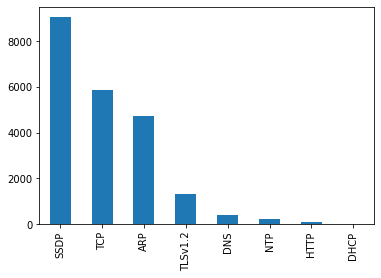

In [ ]:
bar_graph('Protocol')


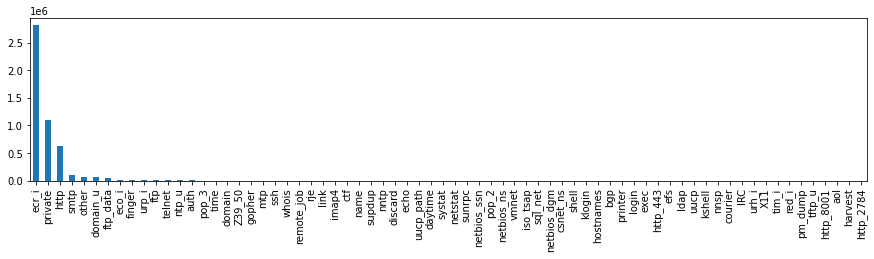

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,3))
bar_graph('service')


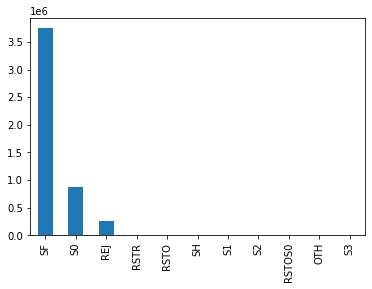

In [ ]:
bar_graph('flag')


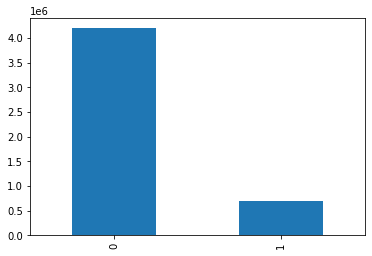

In [ ]:
bar_graph('logged_in')


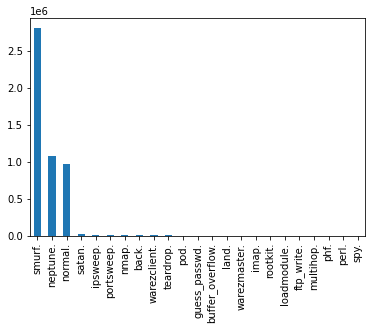

In [ ]:
bar_graph('target')


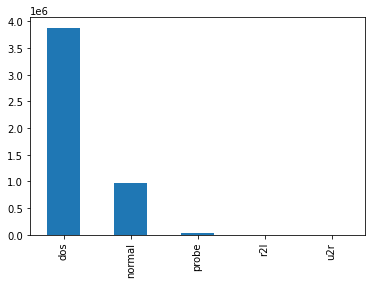

In [ ]:
bar_graph('Attack Type')


In [ ]:
df.columns


Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'target', 'Attack Type'],
      dtype='object')

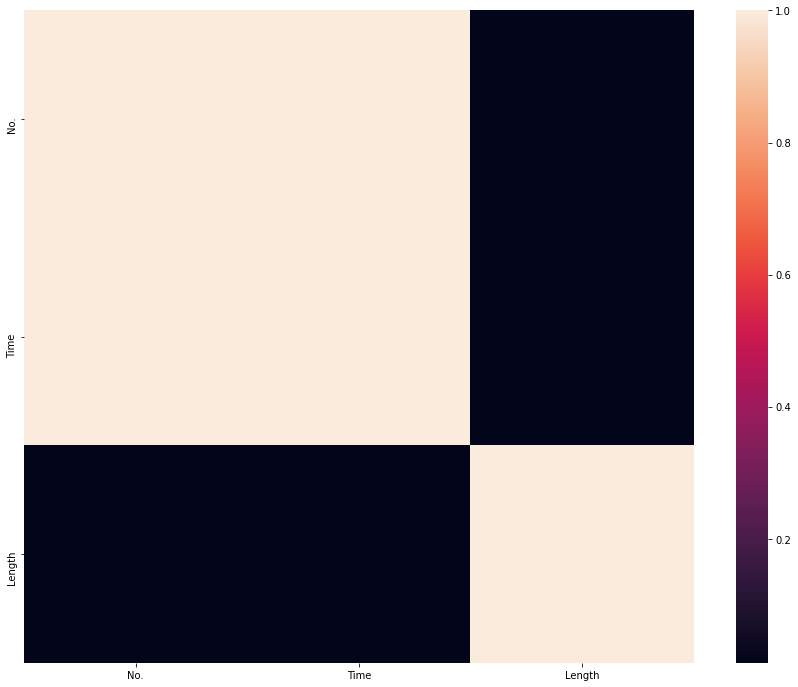

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time


df = df.dropna('columns')# drop columns with NaN

df = df[[col for col in df if df[col].nunique() > 1]]# keep columns where there are more than 1 unique values

corr = df.corr()

plt.figure(figsize=(15,12))

sns.heatmap(corr)

plt.show()


In [ ]:
df['num_root'].corr(df['num_compromised'])


0.9975798933487886

In [ ]:
df['srv_serror_rate'].corr(df['serror_rate'])


0.9986924138661805

In [ ]:
df['srv_count'].corr(df['count'])


0.9433902218807168

In [ ]:
df['srv_rerror_rate'].corr(df['rerror_rate'])


0.9953719458067455

In [ ]:
df['dst_host_same_srv_rate'].corr(df['dst_host_srv_count'])


0.9788464524219127

In [ ]:
df['dst_host_srv_serror_rate'].corr(df['dst_host_serror_rate'])


0.9982859559765033

In [ ]:
df['dst_host_srv_rerror_rate'].corr(df['dst_host_rerror_rate'])


0.9869790678087113

In [ ]:
df['dst_host_same_srv_rate'].corr(df['same_srv_rate'])


0.9316213679068658

In [ ]:
#This variable is highly correlated with num_compromised and should be ignored for analysis.
#(Correlation = 0.9938277978738366)
df.drop('num_root',axis = 1,inplace = True)

#This variable is highly correlated with serror_rate and should be ignored for analysis.
#(Correlation = 0.9983615072725952)
df.drop('srv_serror_rate',axis = 1,inplace = True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9947309539817937)
df.drop('srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_serror_rate and should be ignored for analysis.
#(Correlation = 0.9993041091850098)
df.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9869947924956001)
df.drop('dst_host_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9821663427308375)
df.drop('dst_host_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9851995540751249)
df.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9865705438845669)
df.drop('dst_host_same_srv_rate',axis = 1, inplace=True)


In [ ]:
df.head(-10)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,tcp,http,SF,215,45076,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0.0,0.0,1.0,0.0,0.0,0,0,0.0,0.00,0.0,normal.,normal
1,0,tcp,http,SF,162,4528,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,2,0.0,0.0,1.0,0.0,0.0,1,1,0.0,1.00,0.0,normal.,normal
2,0,tcp,http,SF,236,1228,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0.0,0.0,1.0,0.0,0.0,2,2,0.0,0.50,0.0,normal.,normal
3,0,tcp,http,SF,233,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,2,0.0,0.0,1.0,0.0,0.0,3,3,0.0,0.33,0.0,normal.,normal
4,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,3,3,0.0,0.0,1.0,0.0,0.0,4,4,0.0,0.25,0.0,normal.,normal


In [ ]:
df.shape


(4898431, 33)

In [ ]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_file_creations', 'num_shells', 'num_access_files',
       'is_guest_login', 'count', 'srv_count', 'serror_rate', 'rerror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'target',
       'Attack Type'],
      dtype='object')

In [ ]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_file_creations,num_shells,num_access_files,is_guest_login,count,srv_count,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,tcp,http,SF,215,45076,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0.0,0.0,1.0,0.0,0.0,0,0,0.0,0.00,0.0,normal.,normal
1,0,tcp,http,SF,162,4528,0,0,0,0,0,1,0,0,0,0,0,0,0,2,2,0.0,0.0,1.0,0.0,0.0,1,1,0.0,1.00,0.0,normal.,normal
2,0,tcp,http,SF,236,1228,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0.0,0.0,1.0,0.0,0.0,2,2,0.0,0.50,0.0,normal.,normal
3,0,tcp,http,SF,233,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,2,2,0.0,0.0,1.0,0.0,0.0,3,3,0.0,0.33,0.0,normal.,normal
4,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,3,3,0.0,0.0,1.0,0.0,0.0,4,4,0.0,0.25,0.0,normal.,normal


['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_file_creations', 'num_shells', 'num_access_files',
       'is_guest_login', 'count', 'srv_count', 'serror_rate', 'rerror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'target',
       'Attack Type'

In [ ]:
df_std = df.std()
df_std = df_std.sort_values(ascending = True)
df_std


land                                0.002391
urgent                              0.007215
num_failed_logins                   0.007299
su_attempted                        0.008082
root_shell                          0.008257
num_shells                          0.008738
is_guest_login                      0.028887
num_access_files                    0.035510
dst_host_srv_diff_host_rate         0.041260
wrong_fragment                      0.042854
diff_srv_rate                       0.082715
dst_host_diff_srv_rate              0.108543
num_file_creations                  0.124186
srv_diff_host_rate                  0.140560
rerror_rate                         0.232253
logged_in                           0.350612
serror_rate                         0.381876
same_srv_rate                       0.389296
hot                                 0.468978
dst_host_same_src_port_rate         0.480988
num_compromised                     3.856481
dst_host_count                     64.020937
dst_host_s

In [ ]:
df['Protocol'].value_counts()


SSDP       9048
TCP        5856
ARP        4743
TLSv1.2    1314
DNS         382
NTP         207
HTTP        110
DHCP          4
Name: Protocol, dtype: int64

In [ ]:
#protocol_type feature mapping
pmap = {'icmp':0,'tcp':1,'udp':2}
df['protocol_type'] = df['protocol_type'].map(pmap)

In [ ]:
df['flag'].value_counts()


SF        3744328
S0         869829
REJ        268874
RSTR         8094
RSTO         5344
SH           1040
S1            532
S2            161
RSTOS0        122
OTH            57
S3             50
Name: flag, dtype: int64

In [ ]:
#flag feature mapping
fmap = {'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5 ,'S1':6 ,'S2':7,'RSTOS0':8,'S3':9 ,'OTH':10}
df['flag'] = df['flag'].map(fmap)


In [ ]:
df.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_file_creations,num_shells,num_access_files,is_guest_login,count,srv_count,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,1,http,0,215,45076,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0.0,0.0,1.0,0.0,0.0,0,0,0.0,0.00,0.0,normal.,normal
1,0,1,http,0,162,4528,0,0,0,0,0,1,0,0,0,0,0,0,0,2,2,0.0,0.0,1.0,0.0,0.0,1,1,0.0,1.00,0.0,normal.,normal
2,0,1,http,0,236,1228,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0.0,0.0,1.0,0.0,0.0,2,2,0.0,0.50,0.0,normal.,normal
3,0,1,http,0,233,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,2,2,0.0,0.0,1.0,0.0,0.0,3,3,0.0,0.33,0.0,normal.,normal
4,0,1,http,0,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,3,3,0.0,0.0,1.0,0.0,0.0,4,4,0.0,0.25,0.0,normal.,normal


In [ ]:
df.drop('service',axis = 1,inplace= True)


In [ ]:
df.shape

(21664, 7)

In [ ]:

x = []

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics


In [ ]:

print(df.shape)

# Target variable and train set



# Split test and train data 
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Protocol'],axis=1), df['Protocol'], test_size=.50, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)
y_test.head()

(21664, 7)
(10832, 6) (10832, 6)
(10832,) (10832,)


2595     SSDP
20809     TCP
13188     TCP
7303     SSDP
17026    SSDP
Name: Protocol, dtype: object

In [ ]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score


In [ ]:
clfg = GaussianNB()


In [ ]:
start_time = time.time()
clfg.fit(X_train, y_train.values.ravel())
end_time = time.time()


In [ ]:
print("Training time: ",end_time-start_time)


Training time:  7.547584056854248


In [ ]:
start_time = time.time()
y_test_pred = clfg.predict(X_train)
end_time = time.time()


In [ ]:
print("Testing time: ",end_time-start_time)


Testing time:  4.664933204650879


In [ ]:
print("Train score is:", clfg.score(X_train, y_train))
print("Test score is:",clfg.score(X_test,y_test))


Train score is: 0.9271786146520298
Test score is: 0.9268665367962422


In [ ]:
#Decision Tree 
from sklearn.tree import DecisionTreeClassifier


In [ ]:
clfd = DecisionTreeClassifier(criterion="entropy", max_depth = 4)


In [ ]:
start_time = time.time()
clfd.fit(X_train, y_train.values.ravel())
end_time = time.time()


In [ ]:
print("Training time: ",end_time-start_time)


Training time:  21.460975885391235


In [ ]:
start_time = time.time()
y_test_pred = clfd.predict(X_train)
end_time = time.time()


In [ ]:
print("Testing time: ",end_time-start_time)


Testing time:  0.45993971824645996


In [ ]:
print("Train score is:", clfd.score(X_train, y_train))
print("Test score is:",clfd.score(X_test,y_test))


Train score is: 0.996125167126353
Test score is: 0.9961453352741724


In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
clfr = RandomForestClassifier(n_estimators=30)
start_time = time.time()
clfr.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ",end_time-start_time)


Training time:  205.34279036521912


In [ ]:
start_time = time.time()
y_test_pred = clfd.predict(X_train)
end_time = time.time()

print("Testing time: ",end_time-start_time)


Testing time:  0.46789979934692383


In [ ]:
print("Train score is:", clfr.score(X_train, y_train))
print("Test score is:",clfr.score(X_test,y_test))


Train score is: 0.9999594752872379
Test score is: 0.9998589530480679


In [ ]:
from sklearn.svm import SVC


In [ ]:
clfs = SVC(gamma = 'scale')

start_time = time.time()
clfs.fit(X_train, y_train.values.ravel())
end_time = time.time()

print("Training time: ",end_time-start_time)


KeyboardInterrupt: ignored

In [ ]:
start_time = time.time()
y_test_pred = clfs.predict(X_train)
end_time = time.time()

print("Testing time: ",end_time-start_time)


In [ ]:
print("Train score is:", clfs.score(X_train, y_train))
print("Test score is:",clfs.score(X_test,y_test))

In [ ]:
names = ['NB','DT','RF','SVM']
values = [92.712,99.613,99.997,99.875]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.bar(names,values)


In [ ]:
names = ['NB','DT','RF','SVM']
values = [92.686,99.614,99.986,99.879]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.bar(names,values)


In [ ]:
names = ['NB','DT','RF','SVM']
values = [7.547,24.461,205.342,216.53651]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.bar(names,values)


In [ ]:
names = ['NB','DT','RF','SVM']
values = [4.664,0.460,0.468,131.44433]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.bar(names,values)


In [ ]:
!pip install kitsune
!pip install radiomics
!pip install scapy

     |████████████████████████████████| 3.0MB 7.4MB/s 
     |████████████████████████████████| 2.3MB 44.9MB/s 
  Created wheel for radiomics: filename=radiomics-0.1-cp37-none-any.whl size=6111 sha256=b3c9c065725444bc097338ae4baf2d76c73aba80bf0321468c8a70d67027ee67
  Stored in directory: /root/.cache/pip/wheels/6b/6b/f2/4218f4350573db89c5c953b748a287b0c16ca4ec5a20a98f4a
Successfully built radiomics
     |████████████████████████████████| 1.0MB 7.3MB/s 
  Created wheel for scapy: filename=scapy-2.4.4-py2.py3-none-any.whl size=1189182 sha256=cdc7bc73f4689b8ad137c2516c0a4ac333c235985c8fcfdede7488c25b989d72
  Stored in directory: /root/.cache/pip/wheels/2c/e7/01/f097df99ac9cd0d4f744c255f918d471d7a4b0766bc84c38c3
Successfully built scapy


In [ ]:
import numpy as np
## Prep AfterImage cython package
import os
import subprocess
import pyximport
pyximport.install()
import AfterImage as af
#import AfterImage_NDSS as af



class netStat:
    #Datastructure for efficent network stat queries
    # HostLimit: no more that this many Host identifiers will be tracked
    # HostSimplexLimit: no more that this many outgoing channels from each host will be tracked (purged periodically)
    # Lambdas: a list of 'window sizes' (decay factors) to track for each stream. nan resolved to default [5,3,1,.1,.01]
    def __init__(self, Lambdas = np.nan, HostLimit=255,HostSimplexLimit=1000):
        #Lambdas
        if np.isnan(Lambdas):
            self.Lambdas = [5,3,1,.1,.01]
        else:
            self.Lambdas = Lambdas

        #HT Limits
        self.HostLimit = HostLimit
        self.SessionLimit = HostSimplexLimit*self.HostLimit*self.HostLimit #*2 since each dual creates 2 entries in memory
        self.MAC_HostLimit = self.HostLimit*10

        #HTs
        self.HT_jit = af.incStatDB(limit=self.HostLimit*self.HostLimit)#H-H Jitter Stats
        self.HT_MI = af.incStatDB(limit=self.MAC_HostLimit)#MAC-IP relationships
        self.HT_H = af.incStatDB(limit=self.HostLimit) #Source Host BW Stats
        self.HT_Hp = af.incStatDB(limit=self.SessionLimit)#Source Host BW Stats


    def findDirection(self,IPtype,srcIP,dstIP,eth_src,eth_dst): #cpp: this is all given to you in the direction string of the instance (NO NEED FOR THIS FUNCTION)
        if IPtype==0: #is IPv4
            lstP = srcIP.rfind('.')
            src_subnet = srcIP[0:lstP:]
            lstP = dstIP.rfind('.')
            dst_subnet = dstIP[0:lstP:]
        elif IPtype==1: #is IPv6
            src_subnet = srcIP[0:round(len(srcIP)/2):]
            dst_subnet = dstIP[0:round(len(dstIP)/2):]
        else: #no Network layer, use MACs
            src_subnet = eth_src
            dst_subnet = eth_dst

        return src_subnet, dst_subnet

    def updateGetStats(self, IPtype, srcMAC,dstMAC, srcIP, srcProtocol, dstIP, dstProtocol, datagramSize, timestamp):
        # Host BW: Stats on the srcIP's general Sender Statistics
        # Hstat = np.zeros((3*len(self.Lambdas,)))
        # for i in range(len(self.Lambdas)):
        #     Hstat[(i*3):((i+1)*3)] = self.HT_H.update_get_1D_Stats(srcIP, timestamp, datagramSize, self.Lambdas[i])

        #MAC.IP: Stats on src MAC-IP relationships
        MIstat =  np.zeros((3*len(self.Lambdas,)))
        for i in range(len(self.Lambdas)):
            MIstat[(i*3):((i+1)*3)] = self.HT_MI.update_get_1D_Stats(srcMAC+srcIP, timestamp, datagramSize, self.Lambdas[i])

        # Host-Host BW: Stats on the dual traffic behavior between srcIP and dstIP
        HHstat =  np.zeros((7*len(self.Lambdas,)))
        for i in range(len(self.Lambdas)):
            HHstat[(i*7):((i+1)*7)] = self.HT_H.update_get_1D2D_Stats(srcIP, dstIP,timestamp,datagramSize,self.Lambdas[i])

        # Host-Host Jitter:
        HHstat_jit =  np.zeros((3*len(self.Lambdas,)))
        for i in range(len(self.Lambdas)):
            HHstat_jit[(i*3):((i+1)*3)] = self.HT_jit.update_get_1D_Stats(srcIP+dstIP, timestamp, 0, self.Lambdas[i],isTypeDiff=True)

        # Host-Host BW: Stats on the dual traffic behavior between srcIP and dstIP
        HpHpstat =  np.zeros((7*len(self.Lambdas,)))
        if srcProtocol == 'arp':
            for i in range(len(self.Lambdas)):
                HpHpstat[(i*7):((i+1)*7)] = self.HT_Hp.update_get_1D2D_Stats(srcMAC, dstMAC, timestamp, datagramSize, self.Lambdas[i])
        else:  # some other protocol (e.g. TCP/UDP)
            for i in range(len(self.Lambdas)):
                HpHpstat[(i*7):((i+1)*7)] = self.HT_Hp.update_get_1D2D_Stats(srcIP + srcProtocol, dstIP + dstProtocol, timestamp, datagramSize, self.Lambdas[i])

        return np.concatenate((MIstat, HHstat, HHstat_jit, HpHpstat))  # concatenation of stats into one stat vector

    def getNetStatHeaders(self):
        MIstat_headers = []
        Hstat_headers = []
        HHstat_headers = []
        HHjitstat_headers = []
        HpHpstat_headers = []

        for i in range(len(self.Lambdas)):
            MIstat_headers += ["MI_dir_"+h for h in self.HT_MI.getHeaders_1D(Lambda=self.Lambdas[i],ID=None)]
            HHstat_headers += ["HH_"+h for h in self.HT_H.getHeaders_1D2D(Lambda=self.Lambdas[i],IDs=None,ver=2)]
            HHjitstat_headers += ["HH_jit_"+h for h in self.HT_jit.getHeaders_1D(Lambda=self.Lambdas[i],ID=None)]
            HpHpstat_headers += ["HpHp_" + h for h in self.HT_Hp.getHeaders_1D2D(Lambda=self.Lambdas[i], IDs=None, ver=2)]
        return MIstat_headers + Hstat_headers + HHstat_headers + HHjitstat_headers + HpHpstat_headers

In [ ]:
import os
import subprocess

use_extrapolation=False #experimental correlation code
if use_extrapolation:
    print("Importing AfterImage Cython Library")
    if not os.path.isfile("AfterImage.c"): #has not yet been compiled, so try to do so...
        cmd = "python setup.py build_ext --inplace"
        subprocess.call(cmd,shell=True)
#Import dependencies

import csv
import numpy as np
print("Importing Scapy Library")
from scapy.all import *
import os.path
import platform
import subprocess


#Extracts Kitsune features from given pcap file one packet at a time using "get_next_vector()"
# If wireshark is installed (tshark) it is used to parse (it's faster), otherwise, scapy is used (much slower).
# If wireshark is used then a tsv file (parsed version of the pcap) will be made -which you can use as your input next time
class FE:
    def __init__(self,file_path,limit=np.inf):
        self.path = file_path
        self.limit = limit
        self.parse_type = None #unknown
        self.curPacketIndx = 0
        self.tsvin = None #used for parsing TSV file
        self.scapyin = None #used for parsing pcap with scapy

        ### Prep pcap ##
        self.__prep__()

        ### Prep Feature extractor (AfterImage) ###
        maxHost = 100000000000
        maxSess = 100000000000
        self.nstat = netStat(np.nan, maxHost, maxSess)

    def _get_tshark_path(self):
        if platform.system() == 'Windows':
            return 'C:\Program Files\Wireshark\\tshark.exe'
        else:
            system_path = os.environ['PATH']
            for path in system_path.split(os.pathsep):
                filename = os.path.join(path, 'tshark')
                if os.path.isfile(filename):
                    return filename
        return ''

    def __prep__(self):
        ### Find file: ###
        if not os.path.isfile(self.path):  # file does not exist
            print("File: " + self.path + " does not exist")
            raise Exception()

        ### check file type ###
        type = self.path.split('.')[-1]

        self._tshark = self._get_tshark_path()
        ##If file is TSV (pre-parsed by wireshark script)
        if type == "tsv":
            self.parse_type = "tsv"

        ##If file is pcap
        elif type == "pcap" or type == 'pcapng':
            # Try parsing via tshark dll of wireshark (faster)
            if os.path.isfile(self._tshark):
                self.pcap2tsv_with_tshark()  # creates local tsv file
                self.path += ".tsv"
                self.parse_type = "tsv"
            else: # Otherwise, parse with scapy (slower)
                print("tshark not found. Trying scapy...")
                self.parse_type = "scapy"
        else:
            print("File: " + self.path + " is not a tsv or pcap file")
            raise Exception()

        ### open readers ##
        if self.parse_type == "tsv":
            maxInt = sys.maxsize
            decrement = True
            while decrement:
                # decrease the maxInt value by factor 10
                # as long as the OverflowError occurs.
                decrement = False
                try:
                    csv.field_size_limit(maxInt)
                except OverflowError:
                    maxInt = int(maxInt / 10)
                    decrement = True

            print("counting lines in file...")
            num_lines = sum(1 for line in open(self.path))
            print("There are " + str(num_lines) + " Packets.")
            self.limit = min(self.limit, num_lines-1)
            self.tsvinf = open(self.path, 'rt', encoding="utf8")
            self.tsvin = csv.reader(self.tsvinf, delimiter='\t')
            row = self.tsvin.__next__() #move iterator past header

        else: # scapy
            print("Reading PCAP file via Scapy...")
            self.scapyin = rdpcap(self.path)
            self.limit = len(self.scapyin)
            print("Loaded " + str(len(self.scapyin)) + " Packets.")

    def get_next_vector(self):
        if self.curPacketIndx == self.limit:
            if self.parse_type == 'tsv':
                self.tsvinf.close()
            return []

        ### Parse next packet ###
        if self.parse_type == "tsv":
            row = self.tsvin.__next__()
            IPtype = np.nan
            timestamp = row[0]
            framelen = row[1]
            srcIP = ''
            dstIP = ''
            if row[4] != '':  # IPv4
                srcIP = row[4]
                dstIP = row[5]
                IPtype = 0
            elif row[17] != '':  # ipv6
                srcIP = row[17]
                dstIP = row[18]
                IPtype = 1
            srcproto = row[6] + row[
                8]  # UDP or TCP port: the concatenation of the two port strings will will results in an OR "[tcp|udp]"
            dstproto = row[7] + row[9]  # UDP or TCP port
            srcMAC = row[2]
            dstMAC = row[3]
            if srcproto == '':  # it's a L2/L1 level protocol
                if row[12] != '':  # is ARP
                    srcproto = 'arp'
                    dstproto = 'arp'
                    srcIP = row[14]  # src IP (ARP)
                    dstIP = row[16]  # dst IP (ARP)
                    IPtype = 0
                elif row[10] != '':  # is ICMP
                    srcproto = 'icmp'
                    dstproto = 'icmp'
                    IPtype = 0
                elif srcIP + srcproto + dstIP + dstproto == '':  # some other protocol
                    srcIP = row[2]  # src MAC
                    dstIP = row[3]  # dst MAC

        elif self.parse_type == "scapy":
            packet = self.scapyin[self.curPacketIndx]
            IPtype = np.nan
            timestamp = packet.time
            framelen = len(packet)
            if packet.haslayer(IP):  # IPv4
                srcIP = packet[IP].src
                dstIP = packet[IP].dst
                IPtype = 0
            elif packet.haslayer(IPv6):  # ipv6
                srcIP = packet[IPv6].src
                dstIP = packet[IPv6].dst
                IPtype = 1
            else:
                srcIP = ''
                dstIP = ''

            if packet.haslayer(TCP):
                srcproto = str(packet[TCP].sport)
                dstproto = str(packet[TCP].dport)
            elif packet.haslayer(UDP):
                srcproto = str(packet[UDP].sport)
                dstproto = str(packet[UDP].dport)
            else:
                srcproto = ''
                dstproto = ''

            srcMAC = packet.src
            dstMAC = packet.dst
            if srcproto == '':  # it's a L2/L1 level protocol
                if packet.haslayer(ARP):  # is ARP
                    srcproto = 'arp'
                    dstproto = 'arp'
                    srcIP = packet[ARP].psrc  # src IP (ARP)
                    dstIP = packet[ARP].pdst  # dst IP (ARP)
                    IPtype = 0
                elif packet.haslayer(ICMP):  # is ICMP
                    srcproto = 'icmp'
                    dstproto = 'icmp'
                    IPtype = 0
                elif srcIP + srcproto + dstIP + dstproto == '':  # some other protocol
                    srcIP = packet.src  # src MAC
                    dstIP = packet.dst  # dst MAC
        else:
            return []

        self.curPacketIndx = self.curPacketIndx + 1


        ### Extract Features
        try:
            return self.nstat.updateGetStats(IPtype, srcMAC, dstMAC, srcIP, srcproto, dstIP, dstproto,
                                                 int(framelen),
                                                 float(timestamp))
        except Exception as e:
            print(e)
            return []


    def pcap2tsv_with_tshark(self):
        print('Parsing with tshark...')
        fields = "-e frame.time_epoch -e frame.len -e eth.src -e eth.dst -e ip.src -e ip.dst -e tcp.srcport -e tcp.dstport -e udp.srcport -e udp.dstport -e icmp.type -e icmp.code -e arp.opcode -e arp.src.hw_mac -e arp.src.proto_ipv4 -e arp.dst.hw_mac -e arp.dst.proto_ipv4 -e ipv6.src -e ipv6.dst"
        cmd =  '"' + self._tshark + '" -r '+ self.path +' -T fields '+ fields +' -E header=y -E occurrence=f > '+self.path+".tsv"
        subprocess.call(cmd,shell=True)
        print("tshark parsing complete. File saved as: "+self.path +".tsv")

    def get_num_features(self):
        return len(self.nstat.getNetStatHeaders())

Importing Scapy Library


In [ ]:
import numpy
from scipy.stats import norm
numpy.seterr(all='ignore')

def pdf(x,mu,sigma): #normal distribution pdf
    x = (x-mu)/sigma
    return numpy.exp(-x**2/2)/(numpy.sqrt(2*numpy.pi)*sigma)

def invLogCDF(x,mu,sigma): #normal distribution cdf
    x = (x - mu) / sigma
    return norm.logcdf(-x) #note: we mutiple by -1 after normalization to better get the 1-cdf

def sigmoid(x):
    return 1. / (1 + numpy.exp(-x))


def dsigmoid(x):
    return x * (1. - x)

def tanh(x):
    return numpy.tanh(x)

def dtanh(x):
    return 1. - x * x

def softmax(x):
    e = numpy.exp(x - numpy.max(x))  # prevent overflow
    if e.ndim == 1:
        return e / numpy.sum(e, axis=0)
    else:  
        return e / numpy.array([numpy.sum(e, axis=1)]).T  # ndim = 2


def ReLU(x):
    return x * (x > 0)

def dReLU(x):
    return 1. * (x > 0)

class rollmean:
    def __init__(self,k):
        self.winsize = k
        self.window = numpy.zeros(self.winsize)
        self.pointer = 0

    def apply(self,newval):
        self.window[self.pointer]=newval
        self.pointer = (self.pointer+1) % self.winsize
        return numpy.mean(self.window)

# probability density for the Gaussian dist
# def gaussian(x, mean=0.0, scale=1.0):
#     s = 2 * numpy.power(scale, 2)
#     e = numpy.exp( - numpy.power((x - mean), 2) / s )

#     return e / numpy.square(numpy.pi * s)

In [ ]:
import sys
import numpy
import json

class dA_params:
    def __init__(self,n_visible = 5, n_hidden = 3, lr=0.001, corruption_level=0.0, gracePeriod = 10000, hiddenRatio=None):
        self.n_visible = n_visible# num of units in visible (input) layer
        self.n_hidden = n_hidden# num of units in hidden layer
        self.lr = lr
        self.corruption_level = corruption_level
        self.gracePeriod = gracePeriod
        self.hiddenRatio = hiddenRatio

class dA:
    def __init__(self, params):
        self.params = params

        if self.params.hiddenRatio is not None:
            self.params.n_hidden = int(numpy.ceil(self.params.n_visible*self.params.hiddenRatio))

        # for 0-1 normlaization
        self.norm_max = numpy.ones((self.params.n_visible,)) * -numpy.Inf
        self.norm_min = numpy.ones((self.params.n_visible,)) * numpy.Inf
        self.n = 0

        self.rng = numpy.random.RandomState(1234)

        a = 1. / self.params.n_visible
        self.W = numpy.array(self.rng.uniform(  # initialize W uniformly
            low=-a,
            high=a,
            size=(self.params.n_visible, self.params.n_hidden)))

        self.hbias = numpy.zeros(self.params.n_hidden)  # initialize h bias 0
        self.vbias = numpy.zeros(self.params.n_visible)  # initialize v bias 0
        self.W_prime = self.W.T


    def get_corrupted_input(self, input, corruption_level):
        assert corruption_level < 1

        return self.rng.binomial(size=input.shape,
                                 n=1,
                                 p=1 - corruption_level) * input

    # Encode
    def get_hidden_values(self, input):
        return sigmoid(numpy.dot(input, self.W) + self.hbias)

    # Decode
    def get_reconstructed_input(self, hidden):
        return sigmoid(numpy.dot(hidden, self.W_prime) + self.vbias)

    def train(self, x):
        self.n = self.n + 1
        # update norms
        self.norm_max[x > self.norm_max] = x[x > self.norm_max]
        self.norm_min[x < self.norm_min] = x[x < self.norm_min]

        # 0-1 normalize
        x = (x - self.norm_min) / (self.norm_max - self.norm_min + 0.0000000000000001)

        if self.params.corruption_level > 0.0:
            tilde_x = self.get_corrupted_input(x, self.params.corruption_level)
        else:
            tilde_x = x
        y = self.get_hidden_values(tilde_x)
        z = self.get_reconstructed_input(y)

        L_h2 = x - z
        L_h1 = numpy.dot(L_h2, self.W) * y * (1 - y)

        L_vbias = L_h2
        L_hbias = L_h1
        L_W = numpy.outer(tilde_x.T, L_h1) + numpy.outer(L_h2.T, y)

        self.W += self.params.lr * L_W
        self.hbias += self.params.lr * L_hbias
        self.vbias += self.params.lr * L_vbias
        return numpy.sqrt(numpy.mean(L_h2**2)) #the RMSE reconstruction error during training


    def reconstruct(self, x):
        y = self.get_hidden_values(x)
        z = self.get_reconstructed_input(y)
        return z

    def execute(self, x): #returns MSE of the reconstruction of x
        if self.n < self.params.gracePeriod:
            return 0.0
        else:
            # 0-1 normalize
            x = (x - self.norm_min) / (self.norm_max - self.norm_min + 0.0000000000000001)
            z = self.reconstruct(x)
            rmse = numpy.sqrt(((x - z) ** 2).mean()) #MSE
            return rmse


    def inGrace(self):
        return self.n < self.params.gracePeriod

In [ ]:
import numpy as np
from scipy.cluster.hierarchy import linkage, fcluster, to_tree

# A helper class for KitNET which performs a correlation-based incremental clustering of the dimensions in X
# n: the number of dimensions in the dataset

class corClust:
    def __init__(self,n):
        #parameter:
        self.n = n
        #varaibles
        self.c = np.zeros(n) #linear num of features
        self.c_r = np.zeros(n) #linear sum of feature residules
        self.c_rs = np.zeros(n) #linear sum of feature residules
        self.C = np.zeros((n,n)) #partial correlation matrix
        self.N = 0 #number of updates performed

    # x: a numpy vector of length n
    def update(self,x):
        self.N += 1
        self.c += x
        c_rt = x - self.c/self.N
        self.c_r += c_rt
        self.c_rs += c_rt**2
        self.C += np.outer(c_rt,c_rt)

    # creates the current correlation distance matrix between the features
    def corrDist(self):
        c_rs_sqrt = np.sqrt(self.c_rs)
        C_rs_sqrt = np.outer(c_rs_sqrt,c_rs_sqrt)
        C_rs_sqrt[C_rs_sqrt==0] = 1e-100 #this protects against dive by zero erros (occurs when a feature is a constant)
        D = 1-self.C/C_rs_sqrt #the correlation distance matrix
        D[D<0] = 0 #small negatives may appear due to the incremental fashion in which we update the mean. Therefore, we 'fix' them
        return D

    # clusters the features together, having no more than maxClust features per cluster
    def cluster(self,maxClust):
        D = self.corrDist()
        Z = linkage(D[np.triu_indices(self.n, 1)])  # create a linkage matrix based on the distance matrix
        if maxClust < 1:
            maxClust = 1
        if maxClust > self.n:
            maxClust = self.n
        map = self.__breakClust__(to_tree(Z),maxClust)
        return map

    # a recursive helper function which breaks down the dendrogram branches until all clusters have no more than maxClust elements
    def __breakClust__(self,dendro,maxClust):
        if dendro.count <= maxClust: #base case: we found a minimal cluster, so mark it
            return [dendro.pre_order()] #return the origional ids of the features in this cluster
        return self.__breakClust__(dendro.get_left(),maxClust) + self.__breakClust__(dendro.get_right(),maxClust)

In [ ]:
import numpy as np
import dA as AE
import corClust as CC

# This class represents a KitNET machine learner.
# KitNET is a lightweight online anomaly detection algorithm based on an ensemble of autoencoders.

class KitNET:
    #n: the number of features in your input dataset (i.e., x \in R^n)
    #m: the maximum size of any autoencoder in the ensemble layer
    #AD_grace_period: the number of instances the network will learn from before producing anomaly scores
    #FM_grace_period: the number of instances which will be taken to learn the feature mapping. If 'None', then FM_grace_period=AM_grace_period
    #learning_rate: the default stochastic gradient descent learning rate for all autoencoders in the KitNET instance.
    #hidden_ratio: the default ratio of hidden to visible neurons. E.g., 0.75 will cause roughly a 25% compression in the hidden layer.
    #feature_map: One may optionally provide a feature map instead of learning one. The map must be a list,
    #           where the i-th entry contains a list of the feature indices to be assingned to the i-th autoencoder in the ensemble.
    #           For example, [[2,5,3],[4,0,1],[6,7]]
    def __init__(self,n,max_autoencoder_size=10,FM_grace_period=None,AD_grace_period=10000,learning_rate=0.1,hidden_ratio=0.75, feature_map = None):
        # Parameters:
        self.AD_grace_period = AD_grace_period
        if FM_grace_period is None:
            self.FM_grace_period = AD_grace_period
        else:
            self.FM_grace_period = FM_grace_period
        if max_autoencoder_size <= 0:
            self.m = 1
        else:
            self.m = max_autoencoder_size
        self.lr = learning_rate
        self.hr = hidden_ratio
        self.n = n

        # Variables
        self.n_trained = 0 # the number of training instances so far
        self.n_executed = 0 # the number of executed instances so far
        self.v = feature_map
        if self.v is None:
            print("Feature-Mapper: train-mode, Anomaly-Detector: off-mode")
        else:
            self.__createAD__()
            print("Feature-Mapper: execute-mode, Anomaly-Detector: train-mode")
        self.FM = CC.corClust(self.n) #incremental feature cluatering for the feature mapping process
        self.ensembleLayer = []
        self.outputLayer = None

    #If FM_grace_period+AM_grace_period has passed, then this function executes KitNET on x. Otherwise, this function learns from x.
    #x: a numpy array of length n
    #Note: KitNET automatically performs 0-1 normalization on all attributes.
    def process(self,x):
        if self.n_trained > self.FM_grace_period + self.AD_grace_period: #If both the FM and AD are in execute-mode
            return self.execute(x)
        else:
            self.train(x)
            return 0.0

    #force train KitNET on x
    #returns the anomaly score of x during training (do not use for alerting)
    def train(self,x):
        if self.n_trained <= self.FM_grace_period and self.v is None: #If the FM is in train-mode, and the user has not supplied a feature mapping
            #update the incremetnal correlation matrix
            self.FM.update(x)
            if self.n_trained == self.FM_grace_period: #If the feature mapping should be instantiated
                self.v = self.FM.cluster(self.m)
                self.__createAD__()
                print("The Feature-Mapper found a mapping: "+str(self.n)+" features to "+str(len(self.v))+" autoencoders.")
                print("Feature-Mapper: execute-mode, Anomaly-Detector: train-mode")
        else: #train
            ## Ensemble Layer
            S_l1 = np.zeros(len(self.ensembleLayer))
            for a in range(len(self.ensembleLayer)):
                # make sub instance for autoencoder 'a'
                xi = x[self.v[a]]
                S_l1[a] = self.ensembleLayer[a].train(xi)
            ## OutputLayer
            self.outputLayer.train(S_l1)
            if self.n_trained == self.AD_grace_period+self.FM_grace_period:
                print("Feature-Mapper: execute-mode, Anomaly-Detector: execute-mode")
        self.n_trained += 1

    #force execute KitNET on x
    def execute(self,x):
        if self.v is None:
            raise RuntimeError('KitNET Cannot execute x, because a feature mapping has not yet been learned or provided. Try running process(x) instead.')
        else:
            self.n_executed += 1
            ## Ensemble Layer
            S_l1 = np.zeros(len(self.ensembleLayer))
            for a in range(len(self.ensembleLayer)):
                # make sub inst
                xi = x[self.v[a]]
                S_l1[a] = self.ensembleLayer[a].execute(xi)
            ## OutputLayer
            return self.outputLayer.execute(S_l1)

    def __createAD__(self):
        # construct ensemble layer
        for map in self.v:
            params = AE.dA_params(n_visible=len(map), n_hidden=0, lr=self.lr, corruption_level=0, gracePeriod=0, hiddenRatio=self.hr)
            self.ensembleLayer.append(AE.dA(params))

        # construct output layer
        params = AE.dA_params(len(self.v), n_hidden=0, lr=self.lr, corruption_level=0, gracePeriod=0, hiddenRatio=self.hr)
        self.outputLayer = AE.dA(params)

In [ ]:
from radiomics import *


class Kitsune:
    def __init__(self,file_path,limit,max_autoencoder_size=10,FM_grace_period=None,AD_grace_period=10000,learning_rate=0.1,hidden_ratio=0.75,):
        #init packet feature extractor (AfterImage)
        self.FE = FE(file_path,limit)

        #init Kitnet
        self.AnomDetector = KitNET(self.FE.get_num_features(),max_autoencoder_size,FM_grace_period,AD_grace_period,learning_rate,hidden_ratio)

    def proc_next_packet(self):
        # create feature vector
        x = self.FE.get_next_vector()
        if len(x) == 0:
            return -1 #Error or no packets left

        # process KitNET
        return self.AnomDetector.process(x)  # will train during the grace periods, then execute on all the rest.

In [ ]:

import numpy as np
import time
import pandas as pd
!pip install scapy
from sklearn.metrics import confusion_matrix

tshark not found. Trying scapy...
Reading PCAP file via Scapy...
Loaded 21664 Packets.
Feature-Mapper: train-mode, Anomaly-Detector: off-mode
Running Kitsune:
500
1000
The Feature-Mapper found a mapping: 100 features to 25 autoencoders.
Feature-Mapper: execute-mode, Anomaly-Detector: train-mode
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
Feature-Mapper: execute-mode, Anomaly-Detector: execute-mode
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
The Packet no 11723 has an anamoly.

###[ Ethernet ]### 
  dst       = 78:8a:20:43:93:d5
  src       = 00:17:88:75:b3:82
  type      = IPv4
###[ IP ]### 
     version   = 4
     ihl       = 5
     tos       = 0x0
     len       = 1500
     id        = 3864
     flags     = DF
     frag      = 0
     ttl       = 64
     proto     = 6
     chksum    = 0x9df8
     src       = 192.168.1.132
     dst       = 130.211.67.12
     \options   \
###[ TCP ]### 
        sport     = 60836
        dport     = 80
        seq       = 3860234653


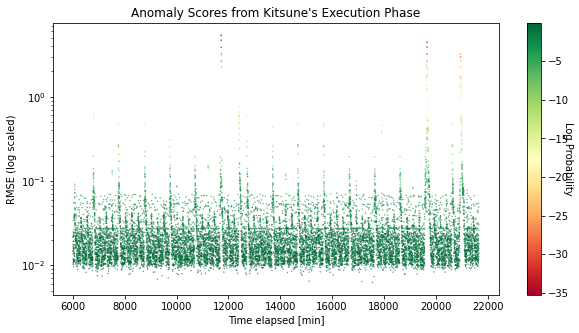

In [ ]:
#import zipfile
#with zipfile.ZipFile("mirai.zip","r") as zip_ref:
#    zip_ref.extractall()


# File location
path = "a.pcap" #the pcap, pcapng, or tsv file to process.
packet_limit = np.Inf #the number of packets to process
f = rdpcap('a.pcap')
#df  = pd.read_csv('a.pcap')
# KitNET params:
maxAE = 10 #maximum size for any autoencoder in the ensemble layer
FMgrace = 1000 #the number of instances taken to learn the feature mapping (the ensemble's architecture)
ADgrace = 5000 #the number of instances used to train the anomaly detector (ensemble itself)

# Build Kitsune
K = Kitsune(path,packet_limit,maxAE,FMgrace,ADgrace)

print("Running Kitsune:")
RMSEs = []
i = 0
mal = 0
start = time.time()
# Here we process (train/execute) each individual packet.
# In this way, each observation is discarded after performing process() method.
while True:
    i+=1
    if i % 500 == 0:
        print(i)
    rmse = K.proc_next_packet()
    if np.log(rmse) > 1:
      mal +=1
      if mal != 1:
        print("The Packet no "+ str(i) +" has an anamoly.\n")
        f[i].show()
    if rmse == -1:
        break
    RMSEs.append(rmse)
stop = time.time()
print("Complete. Time elapsed: "+ str(stop - start)+" \n")

 
  
if mal == 0:
    print("Your PCAP file has no intrusions detected. \n")
else:
    print("Your PCAP file has "+ str(mal) +" intrusions detected. \n")
# Here we demonstrate how one can fit the RMSE scores to a log-normal distribution (useful for finding/setting a cutoff threshold \phi)
from scipy.stats import norm
benignSample = np.log(RMSEs[FMgrace+ADgrace+1:100000])
logProbs = norm.logsf(np.log(RMSEs), np.mean(benignSample), np.std(benignSample))

# plot the RMSE anomaly scores
print("Plotting results")
from matplotlib import pyplot as plt
from matplotlib import cm
plt.figure(figsize=(10,5))
fig = plt.scatter(range(FMgrace+ADgrace+1,len(RMSEs)),RMSEs[FMgrace+ADgrace+1:],s=0.1,c=logProbs[FMgrace+ADgrace+1:],cmap='RdYlGn')
plt.yscale("log")
plt.title("Anomaly Scores from Kitsune's Execution Phase")
plt.ylabel("RMSE (log scaled)")
plt.xlabel("Time elapsed [min]")
figbar=plt.colorbar()
figbar.ax.set_ylabel('Log Probability\n ', rotation=270)
plt.show()

